#### Align reads using bowtie. Filter only reads that aligned and convert the output to a bedfile
##### Bedfile will have the positions of every read that aligned to given reference genome (in this case NC_000913.2)

In [4]:
!bowtie -S -m 1 -v 0 indexes/NC_000913.2 netseq_data/clean_Trimmed_wt-mmc.fastq.gz 2> wt_mmc_NET.log|samtools view -b -h -F 4|bedtools bamtobed -i '-' > wt_mmc_NET_aligned_2.bed 

#### Split alignments by strand and edit the alignment bedfile so that it only keeps the 3' end of each gene
##### 'plus_3end.bed' and 'minus_3end.bed' are the outputfiles that now only have the position of the 3' base

In [8]:
!grep -w '+' wt_mmc_NET_aligned_2.bed|awk '{print $1"\t"$2"\t"($2+1)"\t"".""\t"$5"\t"$6}'> plus_3end_2.bed
!grep -w '-' wt_mmc_NET_aligned_2.bed|awk '{print $1"\t"($3-1)"\t"($3)"\t"".""\t"$5"\t"$6}'> minus_3end_2.bed

#### Import packages needed for plotting

In [120]:
%matplotlib inline  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Make a pandas dataframe of each positon of the E. coli genome (index) and the corresponding 3' base counts that are present in that position.

In [121]:
p_3end=pd.read_table('plus_3end_2.bed',header=None)
m_3end=pd.read_table('minus_3end_2.bed',header=None)
p_counts=pd.DataFrame(p_3end[2].value_counts()).sort_index().reindex(range(1,4641653),fill_value=0)
m_counts=pd.DataFrame(m_3end[2].value_counts()).sort_index().reindex(range(1,4641653),fill_value=0)


#### Import bedfile so that gene positions can be determined (in future will also make GFF/GTF file an option)

In [122]:
gene_annot=pd.read_csv("NC_000913.2.bed",sep='\t',header=None)

#### Find gene of interest in the befile and store the coordinates of the gene location (in the future will make it so a list of genes can be given)

In [127]:
gene='ivbL'
gene_strand=gene_annot[gene_annot[4]==gene].iloc[0][5]
gene_pos=(gene_annot[gene_annot[4]==gene].iloc[0][1],gene_annot[gene_annot[4]==gene].iloc[0][2])

#### Only keep counts that reflect transcription happening on the sense strand

In [128]:
if gene_strand == '+':
    gene_plot=m_counts.iloc[gene_pos[0]:gene_pos[1],:]
if gene_strand == '-':
    gene_plot=p_counts.iloc[gene_pos[0]:gene_pos[1],:]

#### Plot the counts in a barplot (reverse the orientation of the plot if gene is '-'

([], <a list of 0 Text xticklabel objects>)

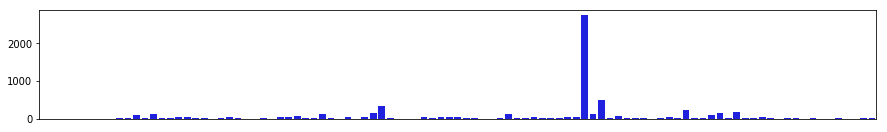

In [129]:
x=gene_plot.index.tolist()
y=gene_plot[2].tolist()
if gene_strand=='-':
    y=y[::-1]
plt.figure(figsize=(15,2))
sns.barplot(x=x,y=y,color='blue')
sns.despine(top=False,right=False,bottom=False,left=False)
plt.xticks([])